<a href="https://colab.research.google.com/github/ramnoa/NanoTraffic/blob/main/Traffic_Violation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=userdata.get('API'))
project = rf.workspace("tp2-xvt9v").project("traffic-violation-detection-nmp13")
version = project.version(4)
dataset = version.download("yolo26")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Violation-Detection-4 in yolo26:: 100%|██████████| 11898/11898 [00:02<00:00, 5677.15it/s]


In [2]:
!pip install ultralytics
from ultralytics import YOLO

model = YOLO('yolo26n.pt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 79.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
Trainning_results = model.train(data='/content/Traffic-Violation-Detection-4/data.yaml', epochs=100)

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Traffic-Violation-Detection-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

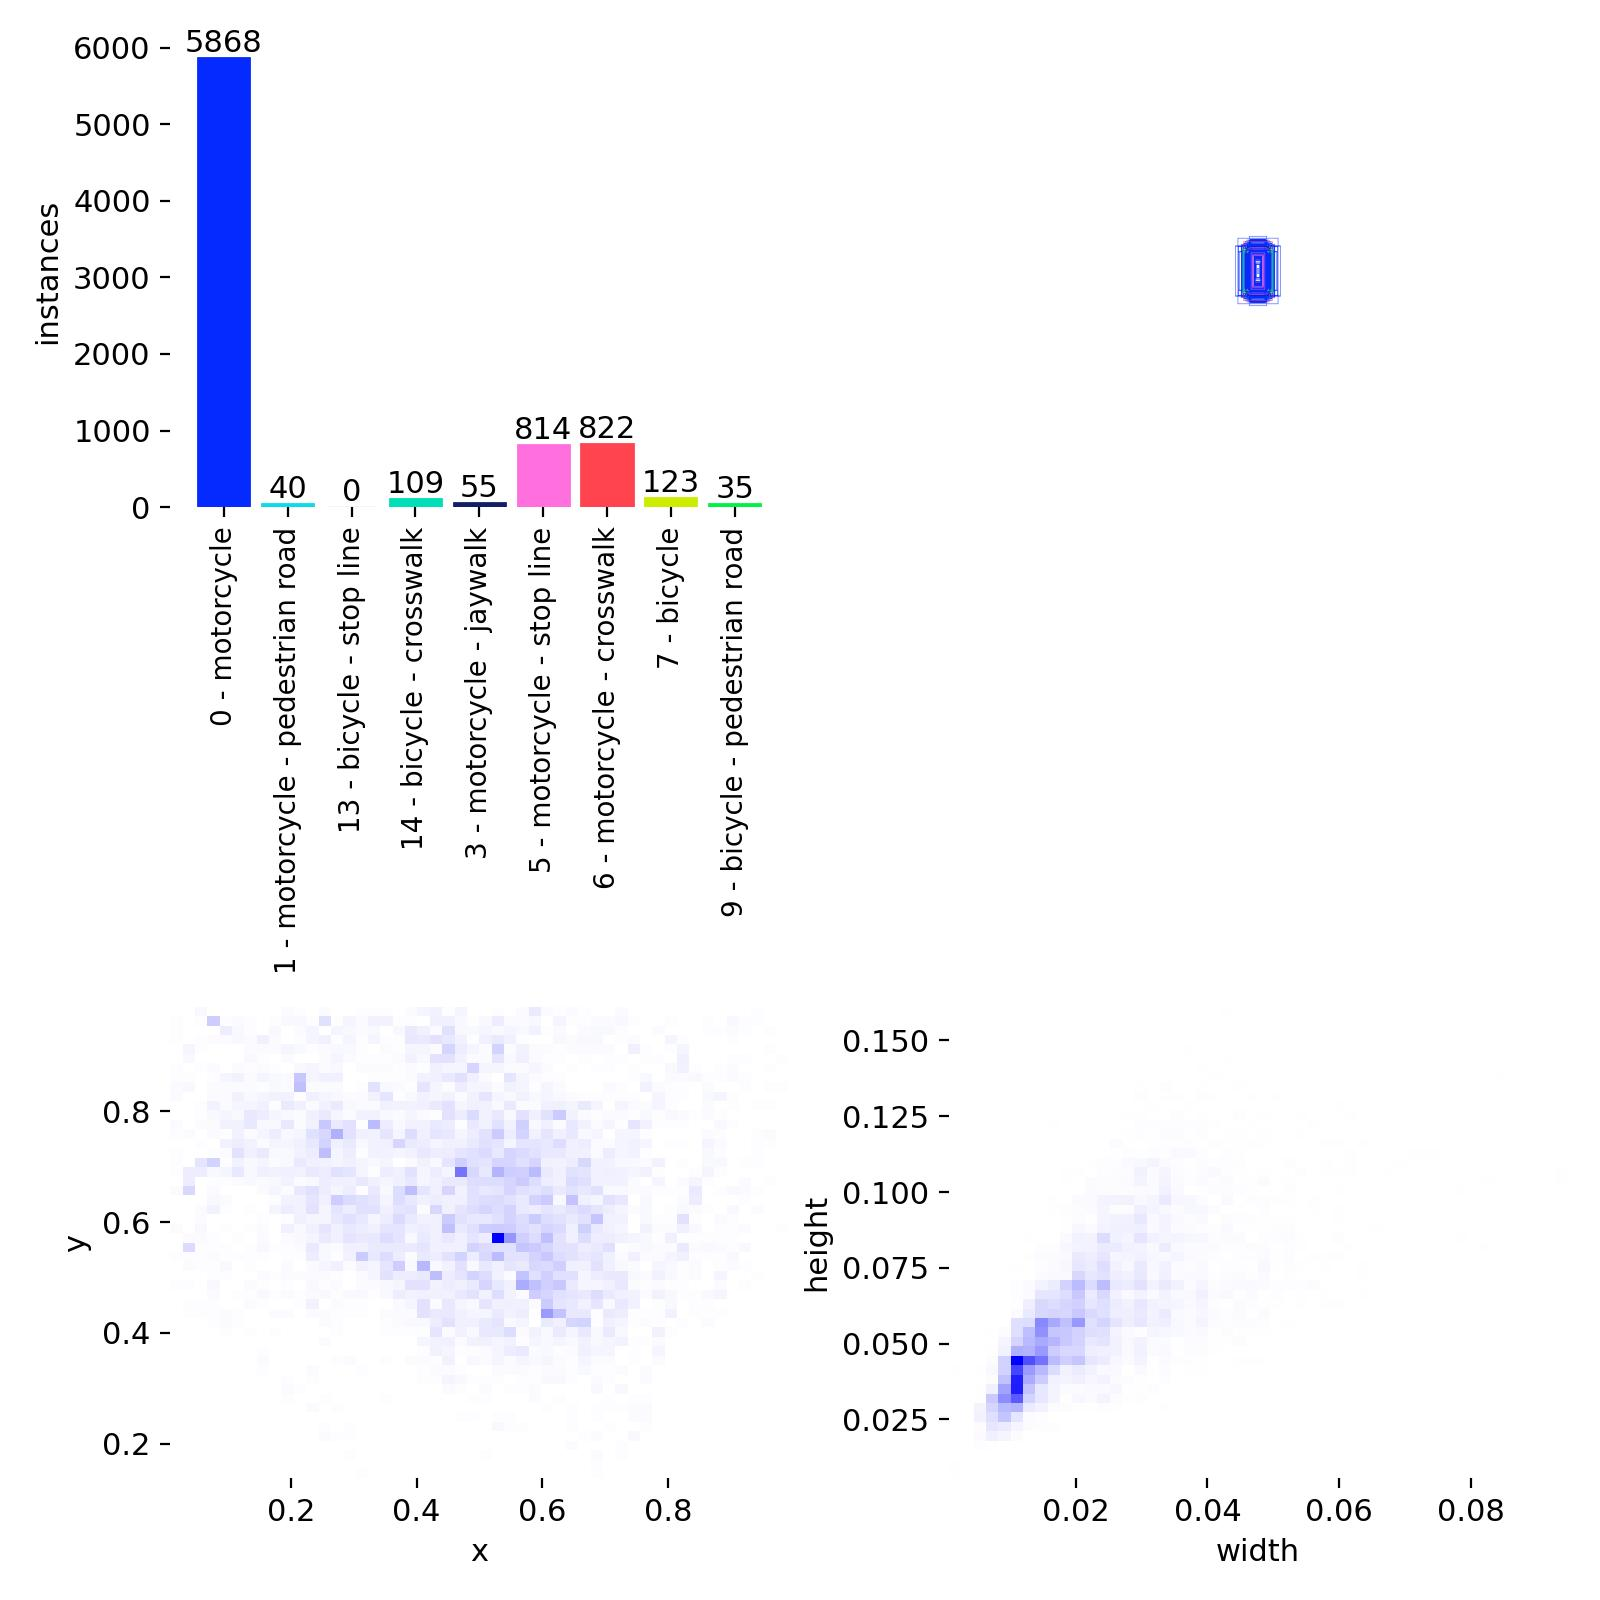

In [6]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train/labels.jpg' , width=1000)

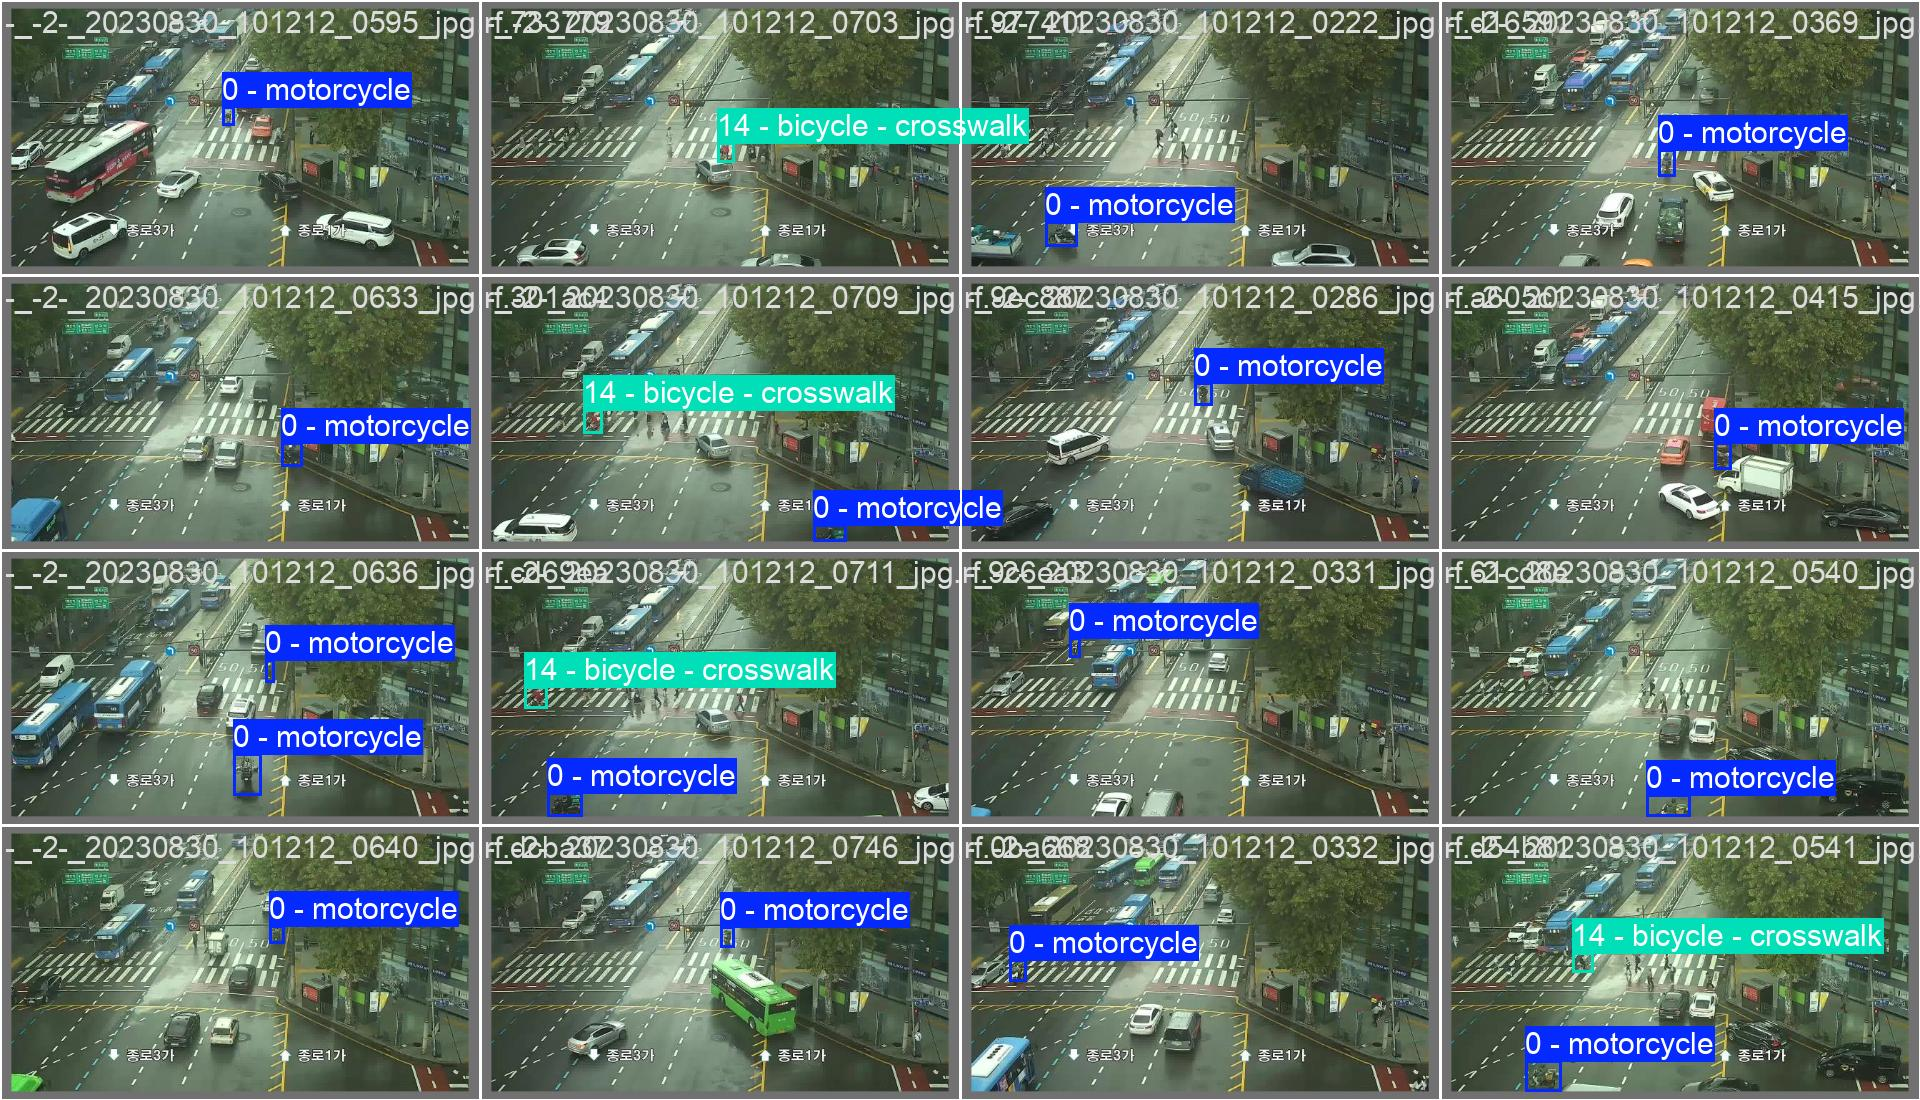

In [8]:
Image(filename=f"/content/runs/detect/train/val_batch1_labels.jpg", width=1000)

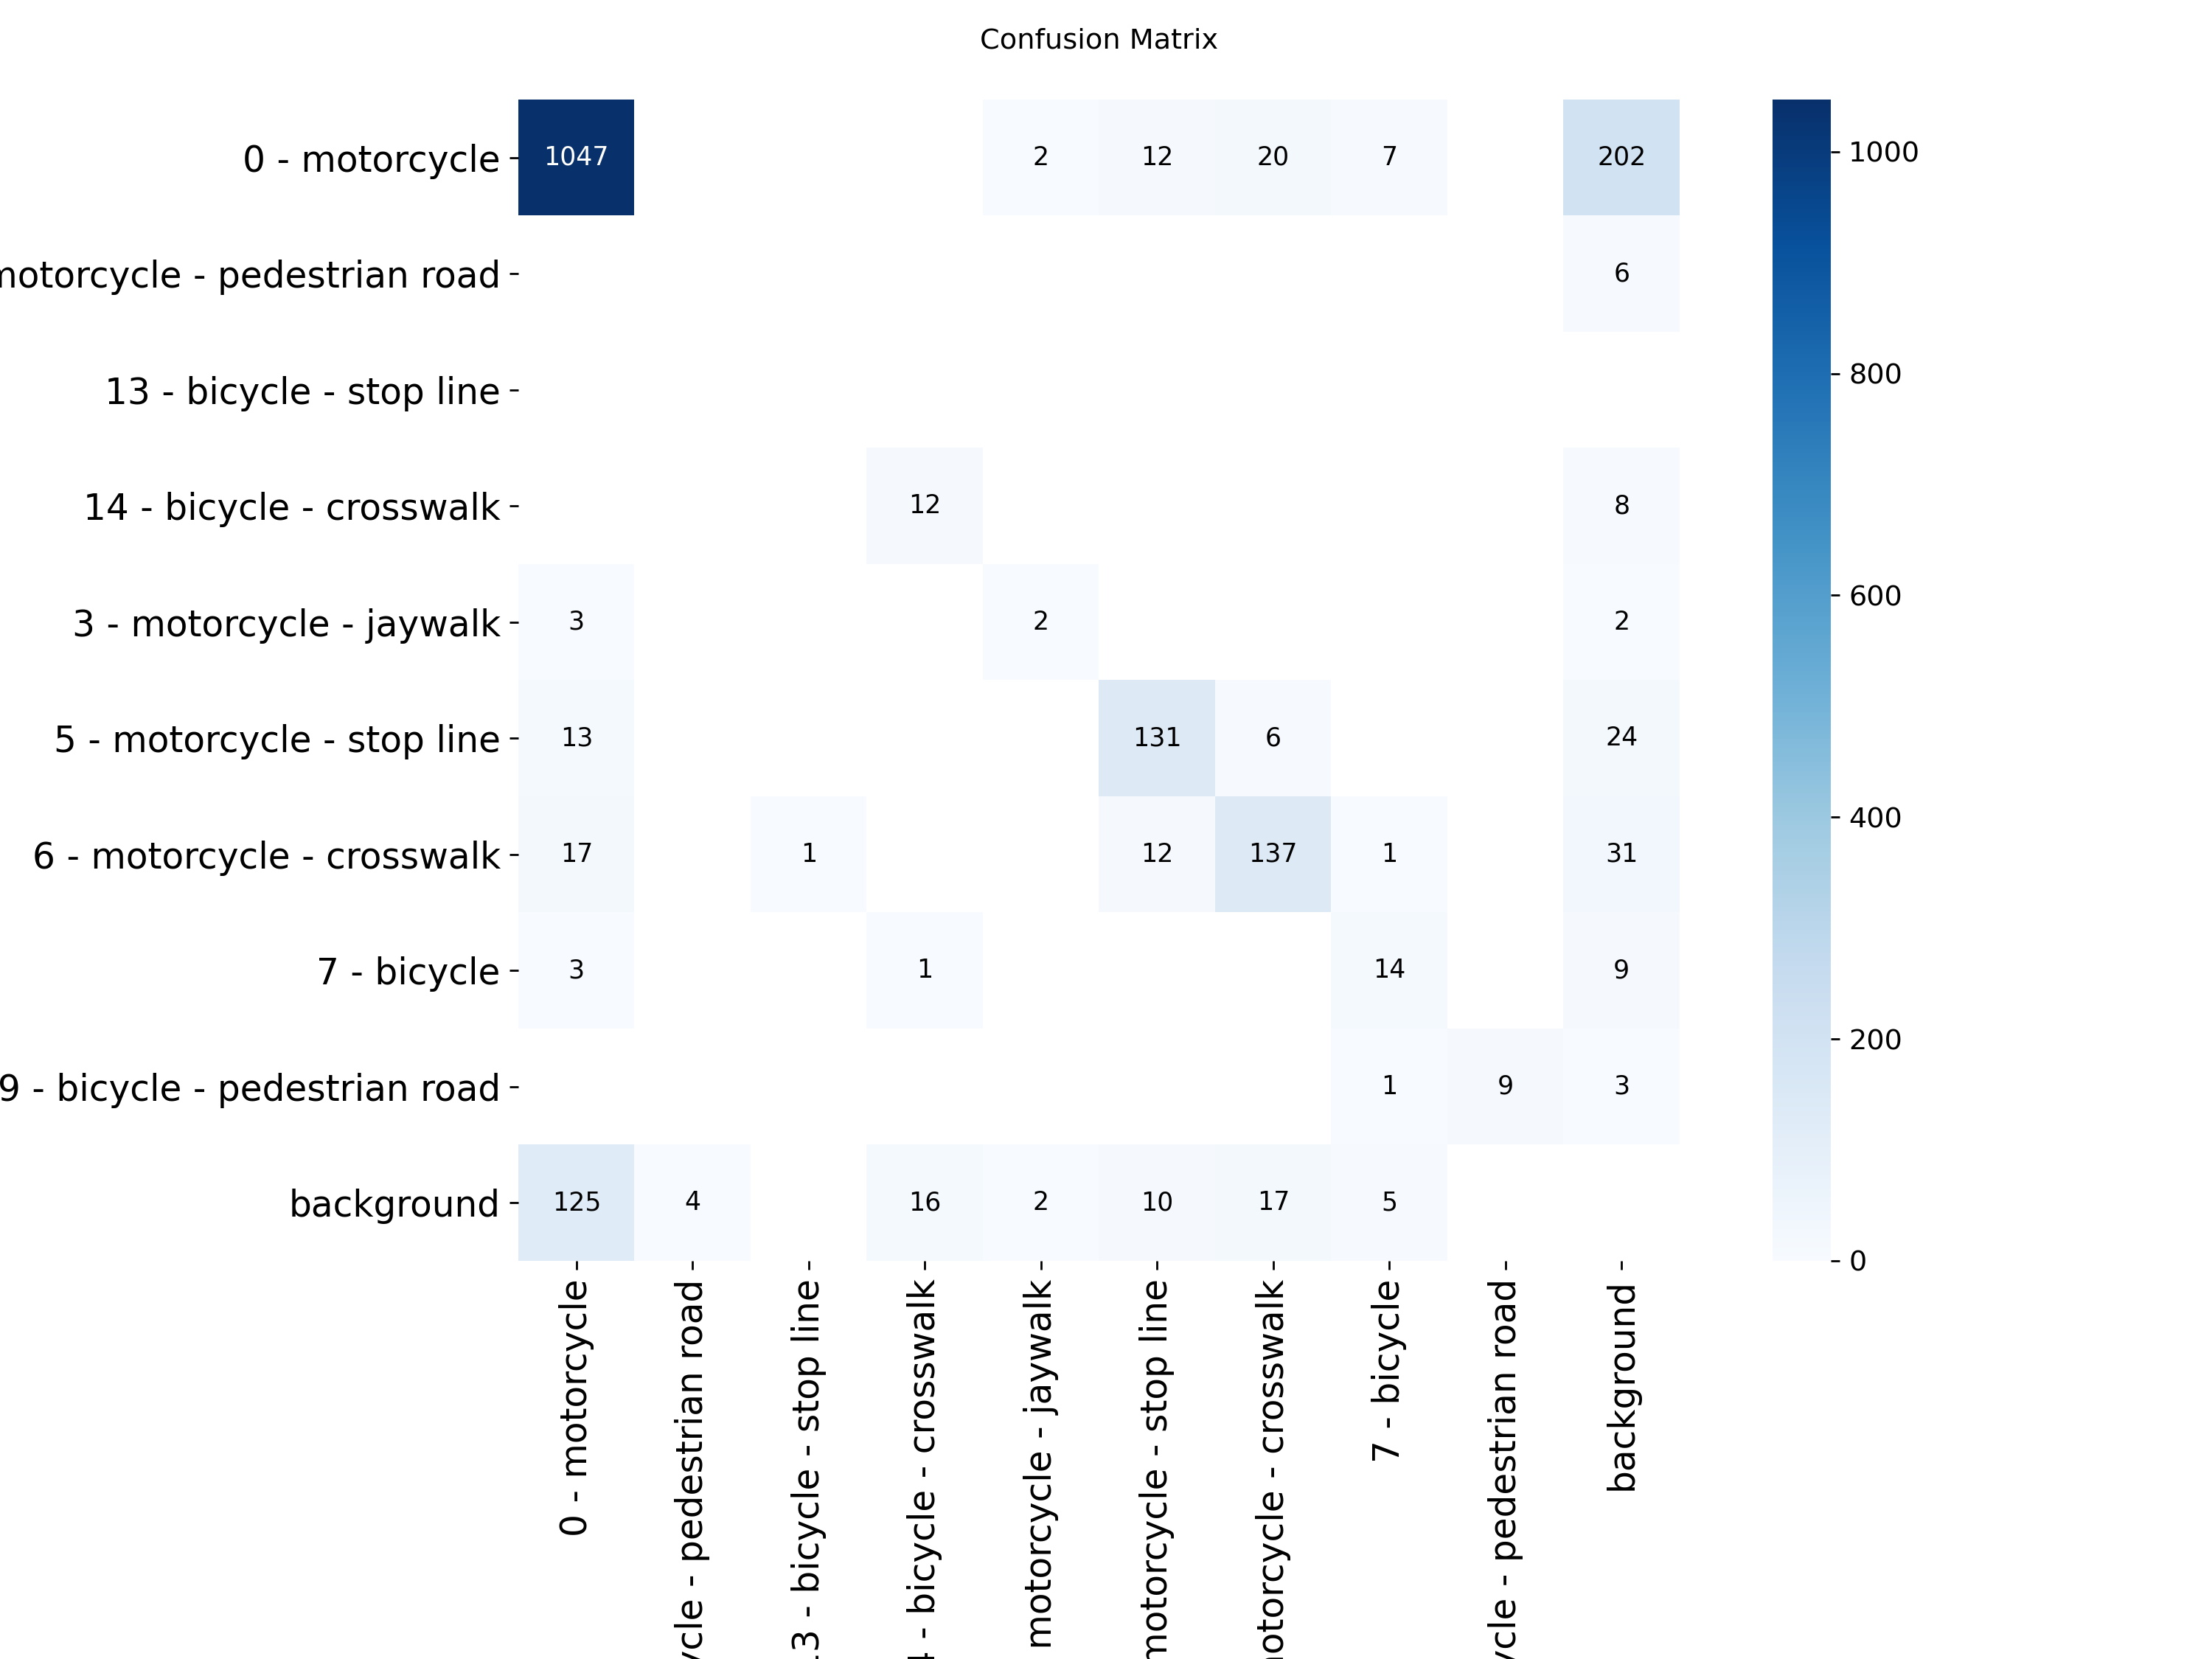

In [10]:
Image(filename=f"/content/runs/detect/train/confusion_matrix.png", width=10000)

In [17]:
test_result=model.predict(model='/content/runs/detect/train/weights/best.pt', source='/content/Traffic-Violation-Detection-4/test/images', save=True)


image 1/594 /content/Traffic-Violation-Detection-4/test/images/-_-2-_20230829_222433_0104_jpg.rf.9d4ce6a5ea1b6f046fb6335517b69456.jpg: 384x640 1 0 - motorcycle, 13.1ms
image 2/594 /content/Traffic-Violation-Detection-4/test/images/-_-2-_20230829_222433_0300_jpg.rf.573b4c28f407cc7a279146f6981b3f75.jpg: 384x640 1 5 - motorcycle - stop line, 9.6ms
image 3/594 /content/Traffic-Violation-Detection-4/test/images/-_-2-_20230829_222433_0551_jpg.rf.d42504b0deb86c4e6cada7b5e320ffd8.jpg: 384x640 1 0 - motorcycle, 9.1ms
image 4/594 /content/Traffic-Violation-Detection-4/test/images/-_-2-_20230829_222433_0910_jpg.rf.12e2d115af0abab7a189bc7e7a8ec24e.jpg: 384x640 2 0 - motorcycles, 9.0ms
image 5/594 /content/Traffic-Violation-Detection-4/test/images/-_-2-_20230830_101212_0028_jpg.rf.7a902335780724565fa3135bc01442ad.jpg: 384x640 1 0 - motorcycle, 9.3ms
image 6/594 /content/Traffic-Violation-Detection-4/test/images/-_-2-_20230830_101212_0030_jpg.rf.4e890fc6b468b4388b0797bb36131dec.jpg: 384x640 1 0 - m

In [ ]:
vedio_results=model.predict(model='/content/runs/detect/train/weights/best.pt',data=)